# Assignment 5

Group: PA 5 31

Members: Erik Berg & David Winroth

Connect to drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Applied ML/Assignment5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Applied ML/Assignment5


## Introduction



Found 1600 images belonging to 2 classes.
annotation image #4: 1.0


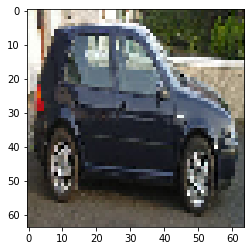

In [ ]:
from tensorflow.keras import applications, datasets, layers, models, losses
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
from matplotlib import pyplot as plt
import numpy as np

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

# Read images from directory
train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

#Generate first batch of training data
Xbatch, Ybatch = train_generator.next()

print("annotation image #4:", Ybatch[4])


plt.imshow(Xbatch[4])
plt.show()


## Part 1

Found 576 images belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_12 (De

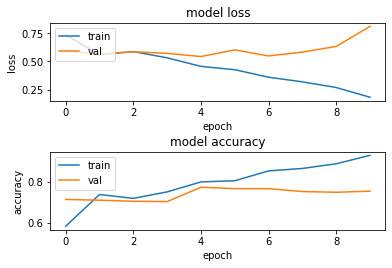

In [ ]:
from tensorflow.keras import applications, datasets, layers, models, losses
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
from matplotlib import pyplot as plt
import numpy as np

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32
input_shape = (img_size, img_size, 3)
num_classes = 1


def make_convnet():
  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
  activation='relu',
  input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(layers.Conv2D(64, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(1000, activation='relu'))
  model.add(layers.Dense(num_classes, activation='sigmoid'))
  
  model.compile(optimizer='adam', 
                loss=losses.BinaryCrossentropy(from_logits=False, label_smoothing=0), 
                metrics=['accuracy'])
  
  print(model.summary())
  return model


# Read images from directory
validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)


cnn = make_convnet()
history = cnn.fit(train_generator, epochs=10, validation_data=validation_generator)
cnn.save_weights('weights')
print("Plain accuracy: ", history.history['val_accuracy'][len(history.history['val_accuracy'])-1])


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'val'], loc="upper left")
plt.show()

**Accuracy of final epoch: (when run on local computer)** 0.7725694179534912

**Part 2, Augmented data model**

Found 1600 images belonging to 2 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 10816)             0         
                                                                 
 dense_14 (D

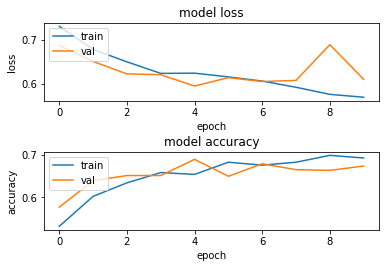

In [ ]:
from tensorflow.keras import applications, datasets, layers, models, losses
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
from matplotlib import pyplot as plt
import numpy as np

augmented_gen = ImageDataGenerator(rescale=1.0/255, 
                                   rotation_range=10, 
                                   vertical_flip=True,
                                   brightness_range=(0.8, 1.2),
                                   shear_range=5
                                   )


# Read images from directory
augmented_train_generator = augmented_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)



cnn = make_convnet()
history = cnn.fit(augmented_train_generator, epochs=10, validation_data=validation_generator)
cnn.save_weights('augmented_weights')
print("Augmented accuracy: ", history.history['val_accuracy'][len(history.history['val_accuracy'])-1])


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'val'], loc="upper left")
plt.show()

**Accuracy of final epoch(When run on local computer):** 0.796875

**Do you see an improvement on the validation set?**

Yes we see an improvement. However it is quite small. 

**Plot the losses and accuracies. Do you see any change?**

Yes, it seems that we don't have as much overfitting when augmenting the data as we have when we just let the classifier run on its own. This is because the images are changes which means that we have larger diversity in the training set and as such it takes a longer time for the classifier to memorize the training set. 


## Interlude

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)


img = load_img("a5_images/train/car/0000.jpg", target_size=(224,224))

arr = img_to_array(img)

preprocessed = preprocess_input(arr)

preprocessed = preprocessed.reshape(1, 224,224, 3)

pred = vggmodel.predict(preprocessed)

print(decode_predictions(pred))

1/1 [==============================] - 1s 790ms/step
[[('n03417042', 'garbage_truck', 0.15934157), ('n03345487', 'fire_engine', 0.11155716), ('n04252225', 'snowplow', 0.100917086), ('n06874185', 'traffic_light', 0.08726411), ('n03977966', 'police_van', 0.08684494)]]


**Does the prediction make sense?**

Yes and no. It correctly identifies that it is some kind of vehicle, but it doesn't identify that it actually is a car. 

## Part 3


In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
from tensorflow.keras import applications, datasets, layers, models, losses

feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                        input_shape=(img_size, img_size, 3))

def create_vgg16_features(input_dir, out_file):

    vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

    train_generator = vgg_data_gen.flow_from_directory(
            imgdir + input_dir,
            target_size=(img_size, img_size),
            batch_size=batch_size,
            class_mode='binary',
            classes=['other', 'car'],
            seed=12345,
            shuffle=False)

    cnn_features = feature_extractor.predict(train_generator)

    with open(out_file, 'wb') as f:
        np.save(f, cnn_features)

create_vgg16_features('/train', 'training_set')
create_vgg16_features('/validation', 'validation_set')

def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

def make_vgg_classifier():
  model = models.Sequential()
  model.add(layers.Flatten())
  model.add(layers.Dense(1000, activation='relu'))
  model.add(layers.Dense(num_classes, activation='sigmoid'))
  
  model.compile(optimizer='adam', 
                loss=losses.BinaryCrossentropy(from_logits=False, label_smoothing=0), 
                metrics=['accuracy'])
  
  return model


def train_on_cnn_features(train_set, val_set):
        with open(train_set, 'rb') as f:
                train_data = np.load(f)
        with open(val_set, 'rb') as f:
                val_data = np.load(f)

        print(train_data.shape)
        print(val_data.shape)
        cnn = make_vgg_classifier()

        history = cnn.fit(train_data, get_labels(len(train_data)), epochs = 10, 
                validation_data =(val_data, get_labels(len(val_data))))
        return history

       
hist = train_on_cnn_features('training_set', 'validation_set')

print(hist.history['val_accuracy'][len(hist.history['val_accuracy'])-1])

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 76s 2s/step
Found 576 images belonging to 2 classes.
18/18 [==============================] - 26s 1s/step
(1600, 2, 2, 512)
(576, 2, 2, 512)
Epoch 1/10
50/50 [==============================] - 4s 48ms/step - loss: 6.0521 - accuracy: 0.8537 - val_loss: 1.1338 - val_accuracy: 0.8802
Epoch 2/10
50/50 [==============================] - 2s 32ms/step - loss: 0.2245 - accuracy: 0.9644 - val_loss: 0.8351 - val_accuracy: 0.9010
Epoch 3/10
50/50 [==============================] - 1s 28ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.7981 - val_accuracy: 0.9080
Epoch 4/10
50/50 [==============================] - 1s 29ms/step - loss: 8.0676e-04 - accuracy: 1.0000 - val_loss: 0.7787 - val_accuracy: 0.9097
Epoch 5/10
50/50 [==============================] - 1s 28ms/step - loss: 2.9189e-04 - accuracy: 1.0000 - val_loss: 0.7812 - val_accuracy: 0.9097
Epoch 6/10
50/50 [==============================] - 1s 28ms/ste

**What is your accuracy this time?**

Our accuracy was 90.97%

This is a lot higher than before. This is because when we use the feature extractor it does a lot of the leg work before we run our own classifier on top. Since the feature extractor assigns some different features to each image, our own classifier is basically a linear classifier. Some features from the extractor are more important for the class "car" than others. For example one could suspect that features such as "trafic light", "fire engine" etc. would have a large weight for the "car" class. Since the classification task becomes linear, a higher accuracy is expected.

**Part 4**

(3, 3, 3, 64)


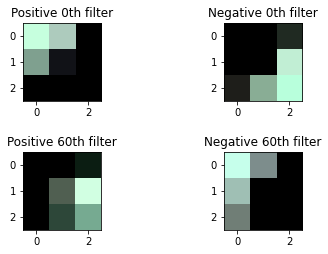

In [25]:
from tensorflow.keras import applications, datasets, layers, models, losses
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
from matplotlib import pyplot as plt
import numpy as np

def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

 
first_layer_weights = feature_extractor.get_weights()[0]
print(first_layer_weights.shape)

f, axarr = plt.subplots(2,2)
f.tight_layout(pad=3.0)
axarr[0,0].imshow(kernel_image(first_layer_weights, 0, True))
axarr[0,0].set_title('Positive 0th filter')
axarr[0,1].imshow(kernel_image(first_layer_weights, 0, False))
axarr[0,1].set_title('Negative 0th filter')
axarr[1,0].imshow(kernel_image(first_layer_weights, 60, True))
axarr[1,0].set_title('Positive 60th filter')
axarr[1,1].imshow(kernel_image(first_layer_weights, 60, False))
axarr[1,1].set_title('Negative 60th filter')
plt.show()